In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
directory_path = 'asl_dataset/'

In [3]:
# Parameters
img_size = 32
validation_split = 0.2
test_split = 0.1

In [4]:
# Function to load images and labels using OpenCV
def load_images_from_directory(directory_path, img_size):
    images = []
    labels = []
    class_names = sorted(os.listdir(directory_path))  # Get sorted class names
    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(directory_path, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)  # Load image using OpenCV
            img = cv2.flip(img, 1)  # Flip image horizontally (mirror-wise)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.GaussianBlur(img, (15, 15), 0)  # Apply Gaussian blur
            _, img = cv2.threshold(img, 161, 255, cv2.THRESH_BINARY)  # Apply thresholding
            img = cv2.resize(img, (img_size, img_size))  # Resize image
            img = img.astype('float32') / 255.0  # Normalize image
            images.append(img)
            labels.append(label)  # Append corresponding label
    return np.array(images), np.array(labels), class_names

In [5]:
# Load the dataset using OpenCV
images, labels, class_names = load_images_from_directory(directory_path, img_size)

In [6]:
# Add a channel dimension to images for grayscale (necessary for CNN models)
images = np.expand_dims(images, axis=-1)

In [7]:
# Split the dataset into training, validation, and test sets
train_images, temp_images, train_labels, temp_labels = train_test_split(
    images, labels, test_size=(validation_split + test_split), random_state=123, stratify=labels
)

In [8]:
val_size = validation_split / (validation_split + test_split)  # Adjust validation size relative to temp set
val_images, test_images, val_labels, test_labels = train_test_split(
    temp_images, temp_labels, test_size=val_size, random_state=123, stratify=temp_labels
)

In [9]:
# Print class names to check
print("Class Names:", class_names)

Class Names: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


In [10]:
# Save the dataset to .npz (compressed format) for later use
np.savez_compressed('asl_dataset.npz', 
                    train_images=train_images, train_labels=train_labels,
                    val_images=val_images, val_labels=val_labels,
                    test_images=test_images, test_labels=test_labels,
                    class_names=class_names)

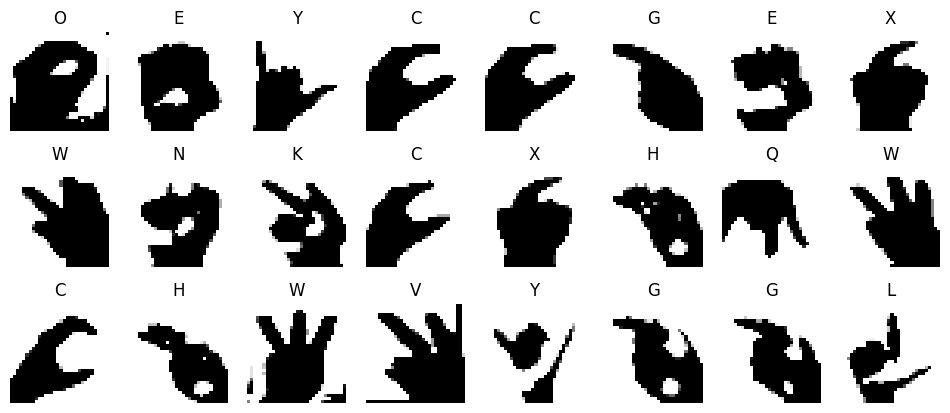

In [11]:
# Visualize 24 sample images from the training set
plt.figure(figsize=(12, 5))
for i in range(24):
    plt.subplot(3, 8, i + 1)
    plt.imshow(train_images[i].squeeze(), cmap='gray')  # Squeeze to remove channel dimension for grayscale
    plt.title(class_names[train_labels[i]])
    plt.axis('off')
plt.show()